In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN


In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Удалим дубликаты и проверим на наличие nan

In [3]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1081


In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Выведем основные статистики

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Имеем большой разброс значений, для большинства признаков, для работы линейныйх моделей потребуется стандартизация

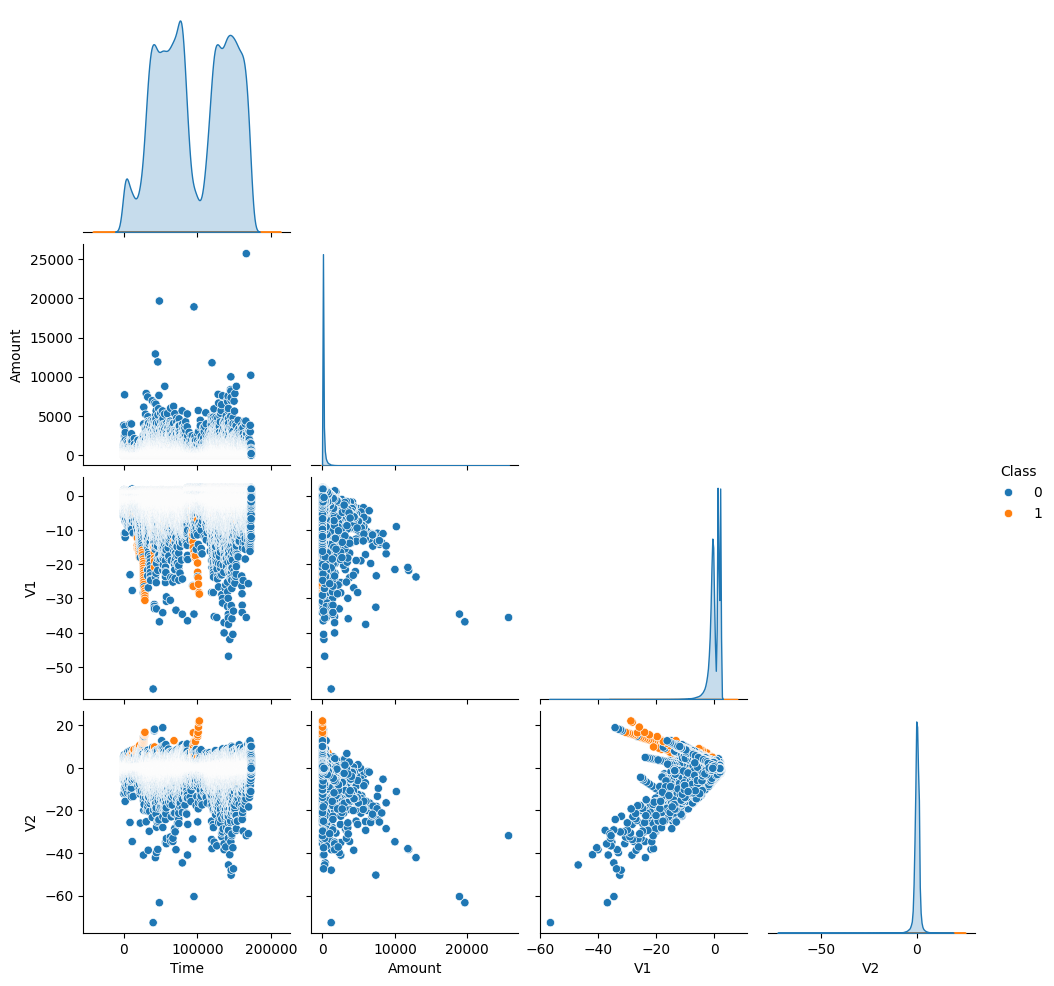

In [6]:
cols = ['Time', 'Amount', 'V1', 'V2', 'Class']
sns.pairplot(df[cols], hue='Class', corner=True)

По представленным зависимостям видно, что классы не являются линейно разделимыми, однако в некоторых случаях эвристически можно провести гиперплоскость, отсекающую значительную часть мошеннических транзакций

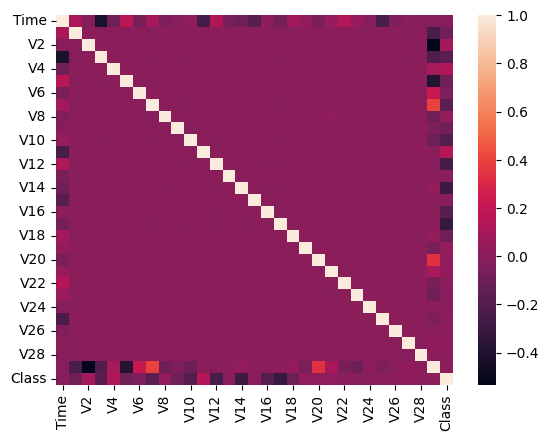

In [7]:
sns.heatmap(df.corr(), cbar=True)
plt.show()

Видим, что столбцы V1-V26 не имеют между собой линейной зависимости и в то же время каждый из них имеет линейную зависимость с целевой переменной, что хорошо.
Cтобцы Time и Amount мало того, что имеют ненулевой коэффициент корреляции с другими столбцами, так еще и не скоррелированы с целевой переменной, что плохо

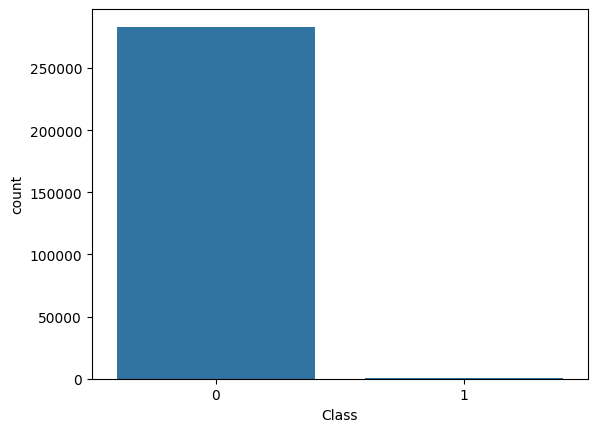

Class
0    283253
1       473
Name: count, dtype: int64

In [8]:
sns.countplot(df, x='Class')
plt.show()
df['Class'].value_counts()

Имеем сильный дисбаланс классов, для решения задачи попробуем использовать линейную модель LogisticRegression и логическую RandomForest. В случае дисбаланса классов метрика accuary, обычно, показывает некорректно большие значения. Будем смотреть на значение Precision и Recall, а также на Pr-Re кривую

Для начала попробуем использовать исходный датасет без применения сэмплирования

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

X_train.describe() - X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,...,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000
mean,349.321162,-0.002689,-0.000255,0.002039,0.010443,0.010629,0.002622,-0.000741,0.002758,-0.006590,...,0.001912,0.003912,-0.000073,-0.001938,0.001932,-0.001253,0.000507,-0.000846,0.003402,-0.503359
std,15.555743,-0.002333,-0.001586,-0.008102,0.017189,-0.064794,-0.023878,-0.094303,-0.016544,-0.002261,...,-0.049513,0.009040,0.000473,-0.012400,-0.002718,-0.001623,-0.003465,-0.015500,0.005570,-25.075175
min,-1.000000,-18.849443,-9.371029,14.644605,-0.123054,81.651178,-4.231194,-10.317913,-22.528299,-2.591540,...,30.850830,-11.941035,1.433721,11.978740,0.011778,1.598770,-0.070221,-12.670435,3.719188,0.000000
25%,238.500000,0.000747,0.003226,0.007934,0.002752,0.004931,0.003387,0.000541,0.000074,-0.001479,...,0.000850,-0.000129,0.002692,-0.000655,0.001579,-0.002673,0.001735,0.000533,0.001122,0.210000
50%,352.000000,-0.011077,0.002021,-0.007644,0.001674,0.005545,-0.002510,0.001078,0.001109,-0.001981,...,0.000647,0.001309,-0.000184,-0.001124,0.000439,-0.001868,0.001958,-0.000102,0.000847,0.180000
75%,272.750000,-0.003153,0.006808,-0.000498,0.013695,0.005580,0.004482,0.006003,0.000725,-0.005851,...,0.000617,0.000876,0.001640,0.000833,0.001836,-0.000798,-0.002883,0.001037,0.001940,0.700000
max,6.000000,0.015723,4.639080,5.280842,0.159807,1.890204,-51.908557,-86.286317,-0.419436,5.202106,...,-1.303695,7.139053,2.230857,0.444867,-0.568207,1.448738,0.054100,-19.459797,17.981087,-6781.160000


In [10]:
y_train.describe()-y_test.describe()

count    113490.000000
mean         -0.000002
std          -0.000021
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: Class, dtype: float64

Статистики в обучающей и тестовой выборке совпадают

Реализуем логистическую регрессию без сэмплирования 

In [11]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_ss, y_train)

pred = lr.predict(X_test_ss)

In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



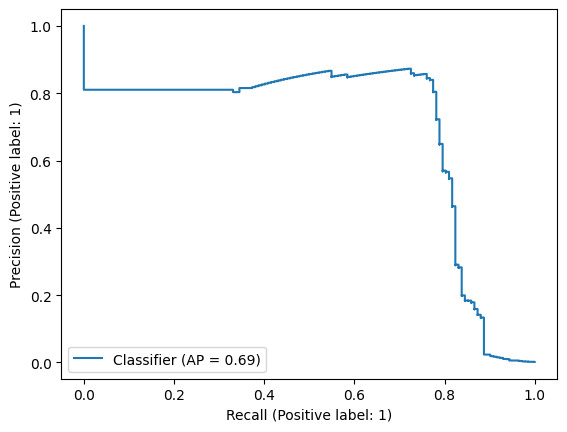

In [13]:
PrecisionRecallDisplay.from_predictions(y_test, lr.predict_proba(X_test_ss)[:,1])

Видим довльно высокий рекол и очень маленький пресижн у мошеннических транзакций, что не очень хорошо, так как маленький пресижн свидетельствует о том, что в целом большинство мошеннических транзакций мы отнесли к валидным

Попробуем применить RandomOverSampling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_ss = ss.fit_transform(X_resampled)
X_test_ss = ss.transform(X_test)

lr = LogisticRegression(class_weight = 'balanced', max_iter=500)
lr.fit(X_resampled, y_resampled)

pred = lr.predict(X_test_ss)

C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.45      0.67      0.54       142

    accuracy                           1.00     85118
   macro avg       0.73      0.83      0.77     85118
weighted avg       1.00      1.00      1.00     85118



C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


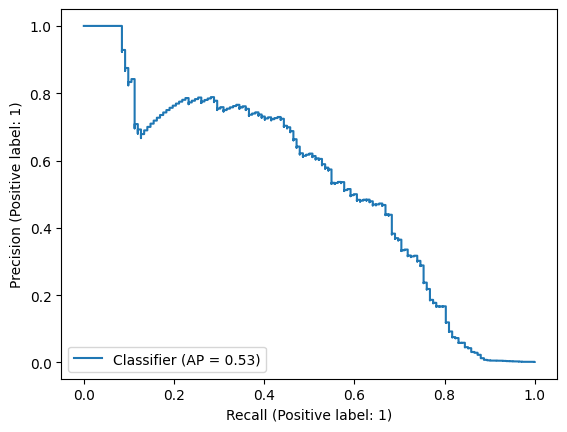

In [16]:
PrecisionRecallDisplay.from_predictions(y_test, lr.predict_proba(X_test_ss)[:,1])

Сэмплирование в целом значительно улучшило пресижн, но ухудшило рекол. Pr-Re AUC меньше, в случае RandomOverSamplig

Попробуем использовать ADASYN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

X_train_ss = ss.fit_transform(X_resampled)
X_test_ss = ss.transform(X_test)

lr = LogisticRegression(class_weight = 'balanced', max_iter=500)
lr.fit(X_resampled, y_resampled)

pred = lr.predict(X_test_ss)

C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.76      0.81       142

    accuracy                           1.00     85118
   macro avg       0.94      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118



C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


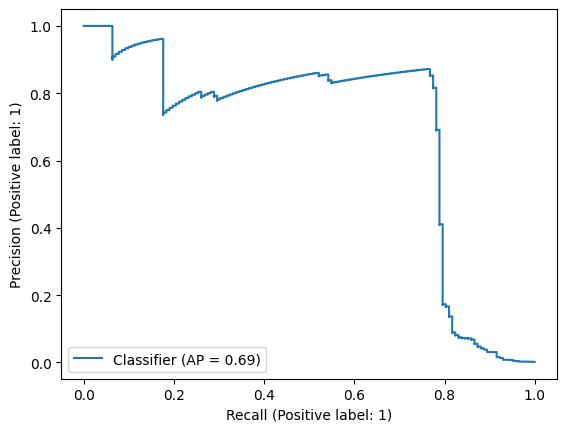

In [19]:
PrecisionRecallDisplay.from_predictions(y_test, lr.predict_proba(X_test_ss)[:,1])

ADASYN демонстрирует лучшие результаты в рамках classification report, однако, Pr-Re кривая хуже у ADASYN, чем у обычной логистической регрессии.

Попробуем использовать RandomForest, для начала, без сэмплирования

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

rf = RandomForestClassifier(class_weight = 'balanced', n_jobs=-1)
rf.fit(X_train_ss, y_train)

pred = rf.predict(X_test_ss)

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.97      0.72      0.83       142

    accuracy                           1.00     85118
   macro avg       0.99      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



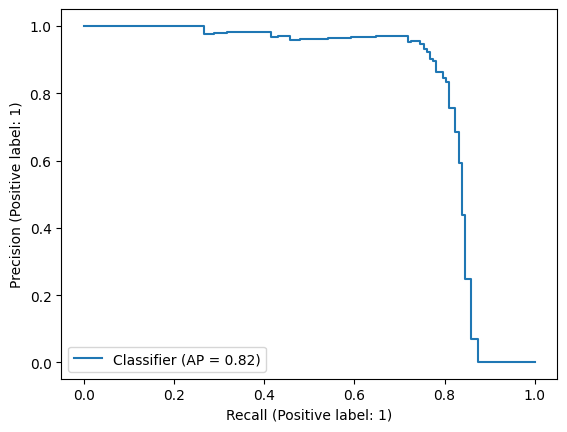

In [22]:
PrecisionRecallDisplay.from_predictions(y_test, rf.predict_proba(X_test_ss)[:,1])

RandomForest показывает наилучшие результаты, среди всех использованных моделей

Аналогично логистической регрессии попробуем и здесь применить те же алгоритмы сэмплирования

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_ss = ss.fit_transform(X_resampled)
X_test_ss = ss.transform(X_test)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_resampled, y_resampled)

pred = rf.predict(X_test_ss)

C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.00      0.00      0.00       142

    accuracy                           1.00     85118
   macro avg       0.50      0.50      0.50     85118
weighted avg       1.00      1.00      1.00     85118



C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


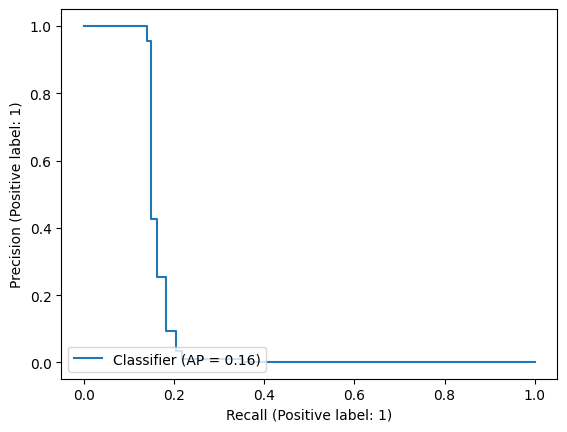

In [25]:
PrecisionRecallDisplay.from_predictions(y_test, rf.predict_proba(X_test_ss)[:,1])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

X_train_ss = ss.fit_transform(X_resampled)
X_test_ss = ss.transform(X_test)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_resampled, y_resampled)

pred = rf.predict(X_test_ss)

C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      0.01      0.01       142

    accuracy                           1.00     85118
   macro avg       1.00      0.50      0.51     85118
weighted avg       1.00      1.00      1.00     85118



C:\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


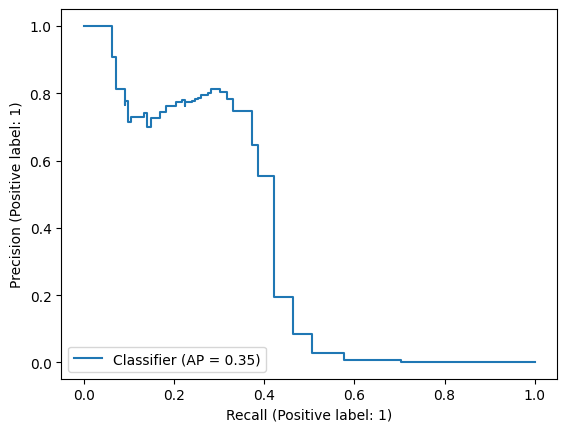

In [28]:
PrecisionRecallDisplay.from_predictions(y_test, rf.predict_proba(X_test_ss)[:,1])

Итого, сэмплирование в случае случайного леса показывает результаты хуже, чем классический случайны лес на исходном датасете с параметрами по умолчанию

Лучшей моделью оказался случайный лес с параметрами по умолчанию 